In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%%capture
import sys
sys.path.insert(0, '/home/raf_pc/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

temp_repo_dir = "/home/raf_pc/Kemal/Temp/human"
data_repo_dir = "/home/raf_pc/Kemal/Data/sam_bukau"
script_path_infrastructure = "/home/raf_pc/Kemal/RiboSeqAnalysis/infrastructure/"

spt = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_TT1.sam", "Sixtymers_TT2.sam"]]
sps = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_Rep1.sam", "Sixtymers_Rep2.sam", "Sixtymers_NoPK.sam"]]

erb_serb = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/EBP1/Rep{i+1}/IP/IP{i+1}.sam" for i in range(2)]
erb_total = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/EBP1/Rep{i+1}/Total/Total{i+1}.sam" for i in range(2)]
nac_serb = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/NAC/Rep{i+1}/IP/IP{i+1}.sam" for i in range(2)]
nac_total = [f"/home/raf_pc/Kemal/Data/sam_bukau/SeRP/NAC/Rep{i+1}/Total/Total{i+1}.sam" for i in range(2)]

coco_d = [os.path.join(data_repo_dir, i) for i in ["Coco_Dis1.sam", "Coco_Dis2.sam"]]
coco_m = [os.path.join(data_repo_dir, i) for i in ["Coco_Mono1.sam", "Coco_Mono2.sam"]]

exclude_genes = ["ENSG00000160789"]

I = Infrastructre(temp_repo_dir,
                  exclude_genes=exclude_genes,
                  ensembl_release=102,
                  organism="homo_sapiens",
                  #include_gene3d=True,
                  verbose=True)

# Should be first to calculate, since multiprocessing is quite memory inefficient.
I.riboseq_coco = RiboSeqCoco(I.temp_repo_dir, coco_m, coco_d, "cocoassembly",
                             selection="best_transcript", assignment=-15,
                             protein_genome_instance=I.protein_genome,
                             gene_info_dictionary=I.gene_info,
                             exclude_genes=I.exclude_genes, verbose=I.verbose)

I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, spt, sps, "sixtymers",
                                       selection="best_transcript", assignment=-15,
                                       protein_genome_instance=I.protein_genome,
                                       gene_info_dictionary=I.gene_info,
                                       exclude_genes=I.exclude_genes, verbose=I.verbose)

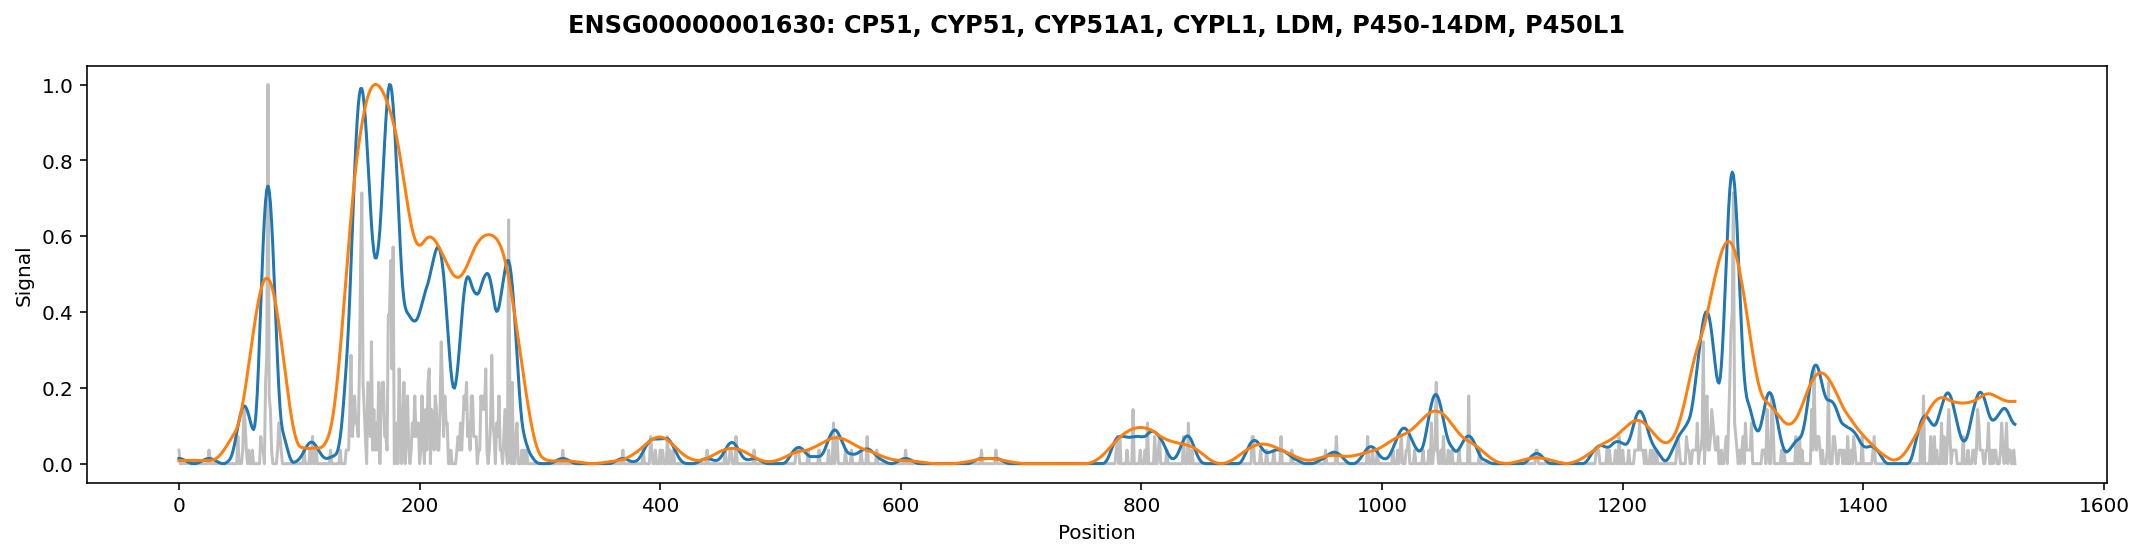

Winner: dsig
Onset: 251
326.3333333333333
[  74  152  175 1291]


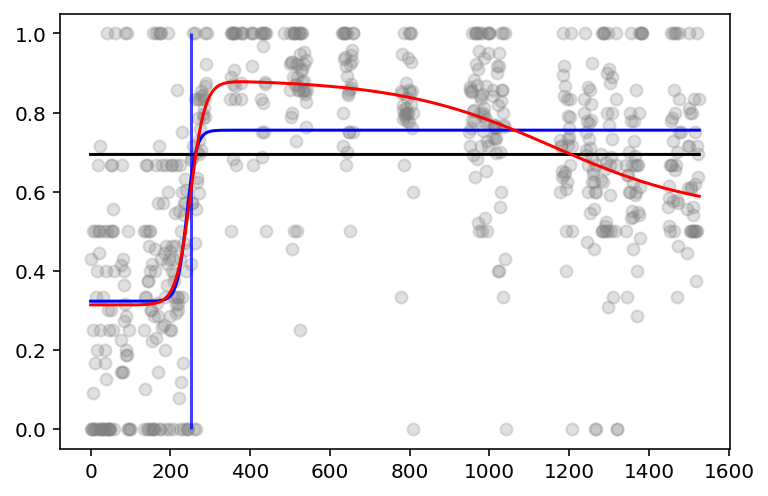

In [18]:
# Example:
gene_id = I.gene_list[17]
# Check 0, 7, 11
# Check 30 for single peak. Compare with 25
gene_rpm_vals = np.mean(I.riboseq_sixtymers.experiment.gene_assignments[gene_id], axis=0)
smooth1 = smooth_array(gene_rpm_vals, window="hanning", window_len = 25)
smooth2 = smooth_array(gene_rpm_vals, window="hanning", window_len = 55)
fig = plt.figure(figsize=(15, 4))
plt.plot(gene_rpm_vals / gene_rpm_vals.max(), alpha=0.5, color="gray")
plt.plot(smooth1 / smooth1.max()); plt.plot(smooth2 / smooth2.max())
plt.ylabel("Signal"); plt.xlabel("Position")
gene_names = ", ".join(I.gene_info[gene_id].gene_names)
plt.title(f"{gene_id}: {gene_names}", y=1.05, fontweight="bold")
plt.tight_layout(); plt.show()
I.riboseq_coco.plot_result(gene_id)
print(np.mean(I.riboseq_sixtymers.experiment.total_assigned_gene[gene_id]))
print(I.riboseq_sixtymers.stalling_peaks_inecik_1(gene_id))